## Assignment 3

In [412]:
# import library that we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

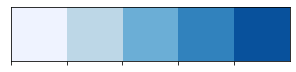

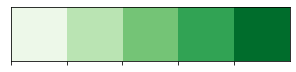

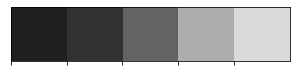

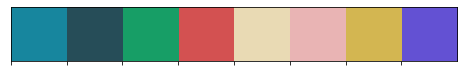

In [413]:
# picking color for visualization
colors_blue = ['#eff3ff','#bdd7e7','#6baed6','#3182bd','#08519c']
colors_green = ['#edf8e9','#bae4b3','#74c476','#31a354','#006d2c']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']

sns.palplot(colors_blue)
sns.palplot(colors_green)
sns.palplot(colors_dark)
sns.palplot(colors_mix)

### Load, Clean, Inspect Data

In [439]:
#read data first
df = pd.read_csv('dataset/bank-additional-full.csv', sep=';', na_values='unknown')

   I picked the bank-additional-full.csv, for this assignment. This dataset, have features like :
   
   ###### Input variables:<br>
   
   ###### bank client data:<br>
   1 - age (numeric) <br>
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")<br>
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)<br>
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")<br>
   5 - default: has credit in default? (categorical: "no","yes","unknown")<br>
   6 - housing: has housing loan? (categorical: "no","yes","unknown")<br>
   7 - loan: has personal loan? (categorical: "no","yes","unknown")<br>
   
   ###### related with the last contact of the current campaign:<br>
   8 - contact: contact communication type (categorical: "cellular","telephone")<br>
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br>
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")<br>
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
   
   ###### other attributes:<br>
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
  14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")<br>
   
   ###### social and economic context attributes<br>
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     <br>
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)   <br>  
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
  20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

  ###### Output variable (desired target):<br>
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")<br>

In [440]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [441]:
# checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [442]:
# is there missing values in this dataset ?
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

job, marital, education, default, housing, loan are the columns that have missing values

In [443]:
# drop the missing values
df.dropna(inplace=True)

In [444]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [445]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,259.484092,2.521451,956.332295,0.194273,-0.071510,93.523311,-40.602263,3.459938,5160.813409
std,10.333529,261.714262,2.720150,201.373292,0.522788,1.610399,0.585374,4.789249,1.777231,75.158065
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,45.000000,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### How's the distribution of target ?

In [446]:
target_no = df['y'].value_counts()[0]
target_yes = df['y'].value_counts()[1]

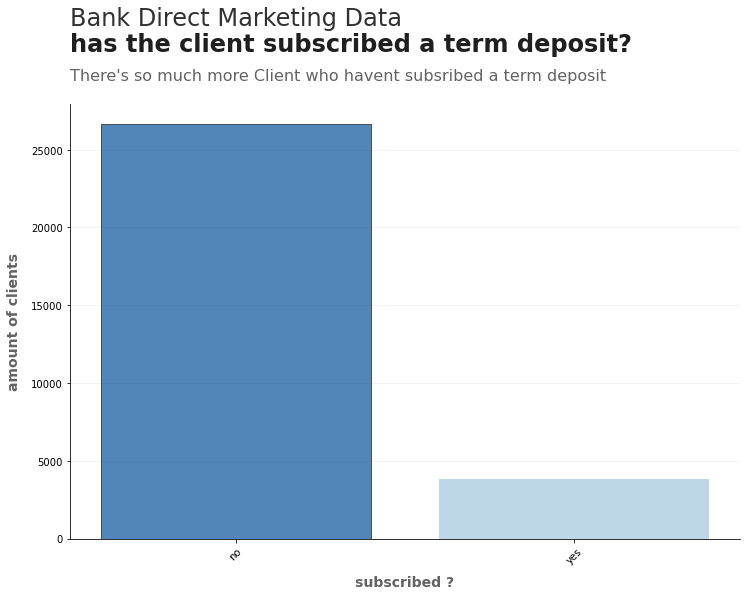

In [447]:
# membuat plot barchart
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(['no','yes'], [target_no,target_yes], color=colors_blue[1])

# menandai bar paling besar
bars[0].set_alpha(0.7)
bars[0].set_color(colors_blue[4])
bars[0].set_edgecolor(colors_dark[0])

# setting figure
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', alpha=0.2)
ax.set_axisbelow(True)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# set label
ax.set_xlabel("subscribed ?", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[2])
ax.set_ylabel("amount of clients", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[2])

plt.text(s="Bank Direct Marketing Data", ha='left', x=xmin, y=ymax*1.18, fontsize=24, color=colors_dark[1])
plt.text(s="has the client subscribed a term deposit?", ha='left', x=xmin, y=ymax*1.12, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("There's so much more Client who havent subsribed a term deposit", y=1.04, loc='left', fontsize=16, color=colors_dark[2]) 

locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

In [448]:
numeric_columns = df.select_dtypes(exclude=['object']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [449]:
numeric_columns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [450]:
categorical_columns

#remove the target
categorical_columns.pop()

'y'

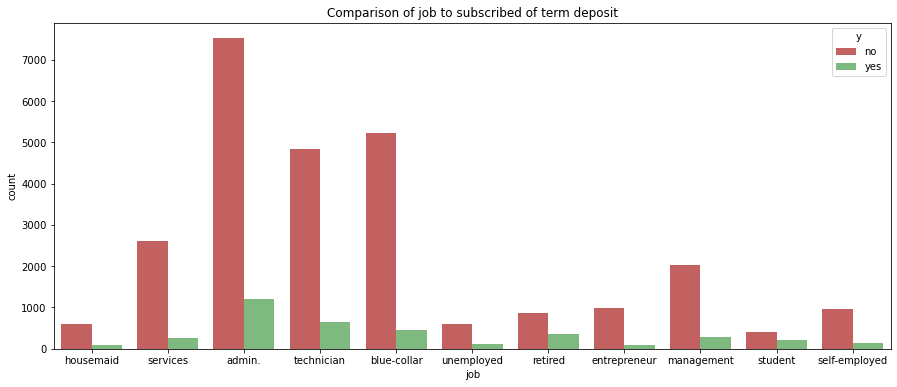

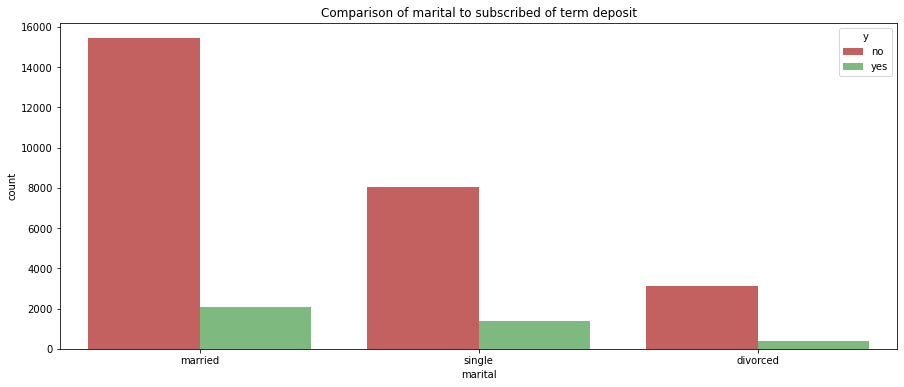

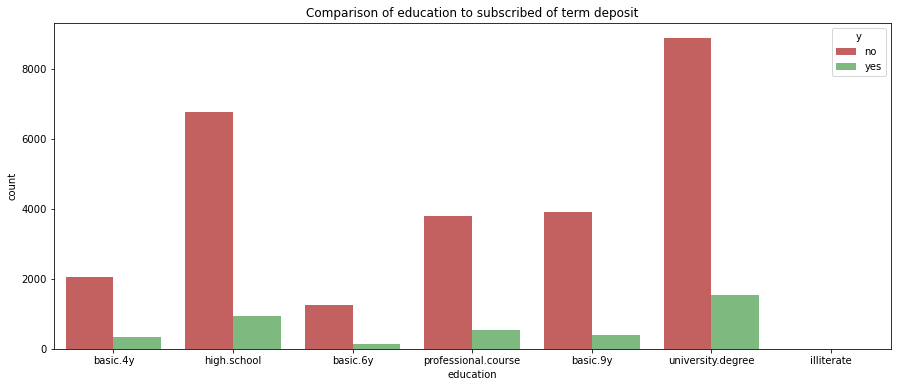

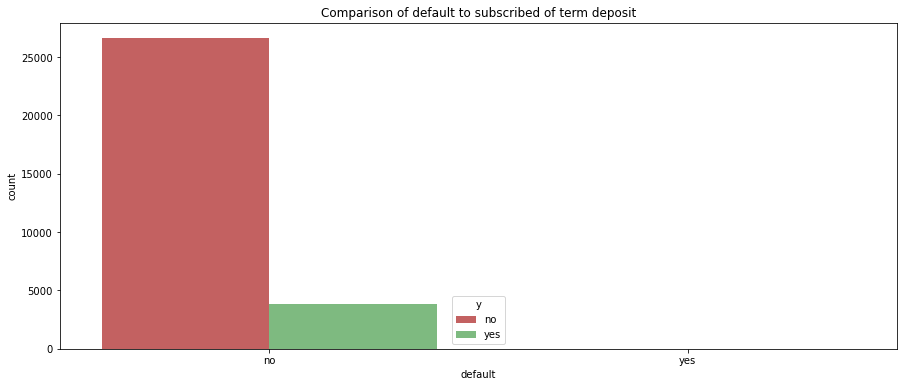

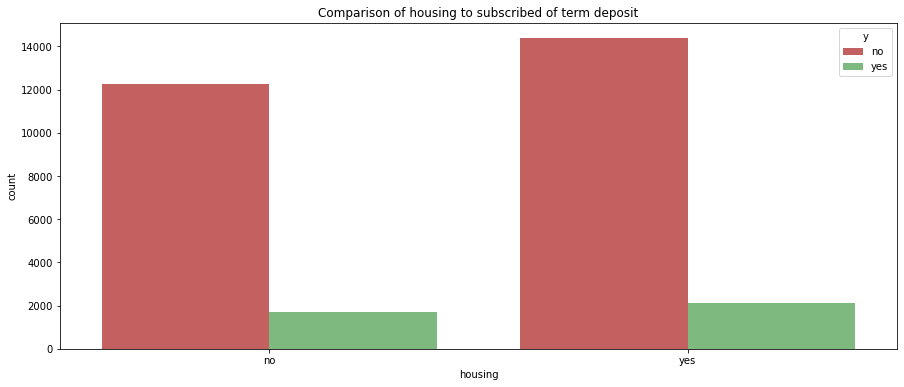

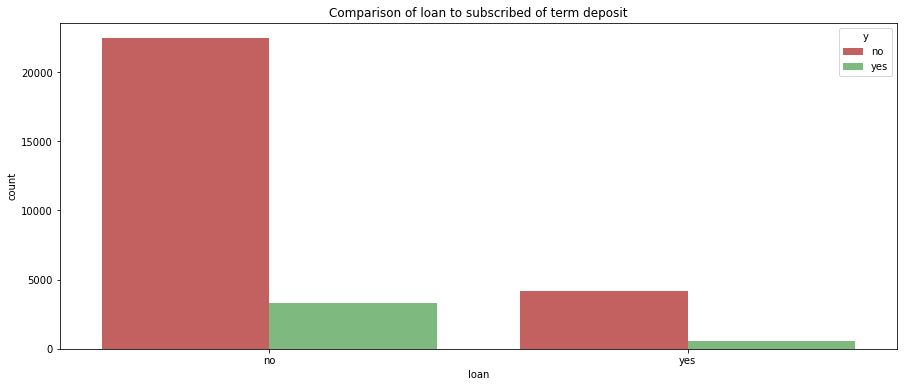

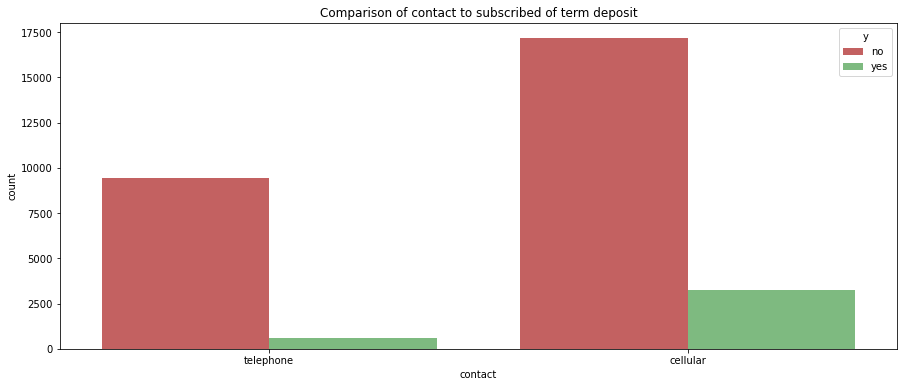

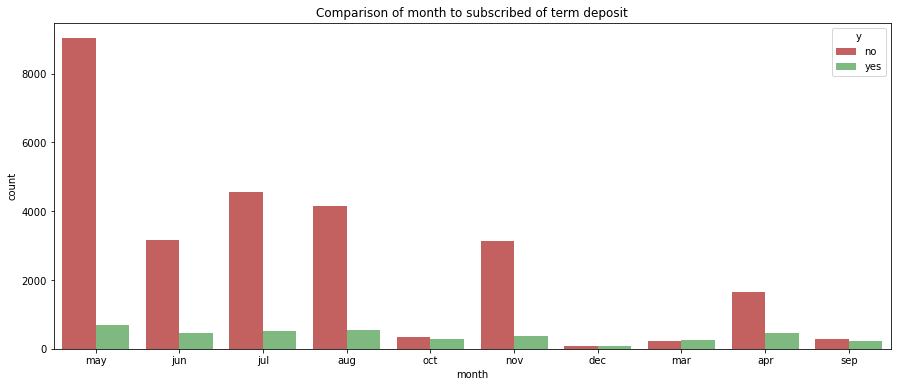

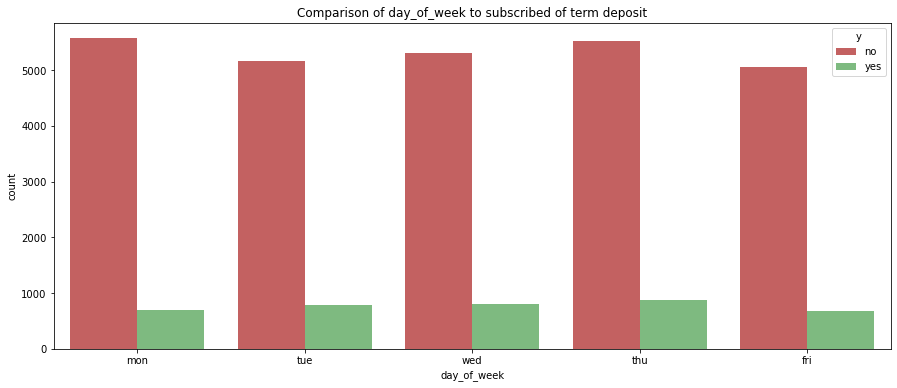

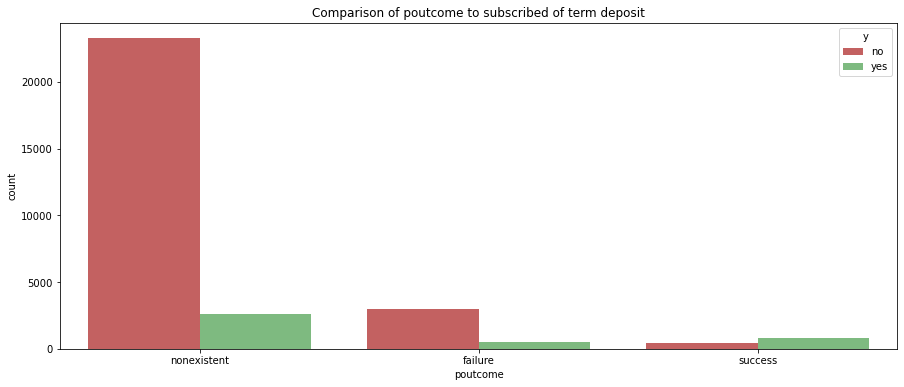

In [451]:
#visualizing the categorical columns
for column in categorical_columns:
    plt.figure(figsize=(15, 6))
    plt.title('Comparison of '+column+' to subscribed of term deposit')
    ax = sns.countplot(x = df[column], hue=df["y"], palette=[colors_mix[3],colors_green[2]])
    plt.show()

- since all default value is 'no', we need to drop this feature
- i think day and month has no effect, so i will drop day and month too

In [452]:
del df['default']
del df['day_of_week']
del df['month']

categorical_columns = list(set(categorical_columns) - set(['default', 'day_of_week', 'month']))

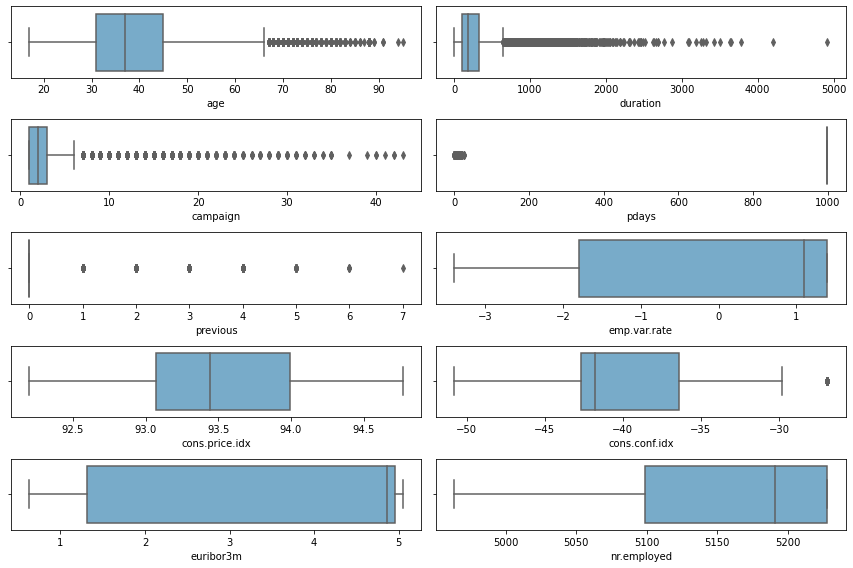

In [453]:
#visualizing the numeric columns
fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(12,8))
for idx, ax in zip(numeric_columns, ax.flat):
    sns.boxplot(x=df[idx], ax=ax, color=colors_blue[2])
    
fig.tight_layout()
plt.show()

- features age, duration, campaign, pdays, previous, cons.conf.idx has outlier
- i think all of this features are not normal distributions

#### encode the data (labelencoder & one hot)

In [454]:
# using label encoder for labeling target
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])

In [455]:
# using pandas dummies to labeling data categorical nominal
for column in categorical_columns:
    dummies = pd.get_dummies(df[column], prefix=column, drop_first=True) #drop_first = True, to avoid multicolinearity
    df = pd.concat([df, dummies], axis=1)
    df = df.drop([column], axis = 1)

#### checking for the high correlation features

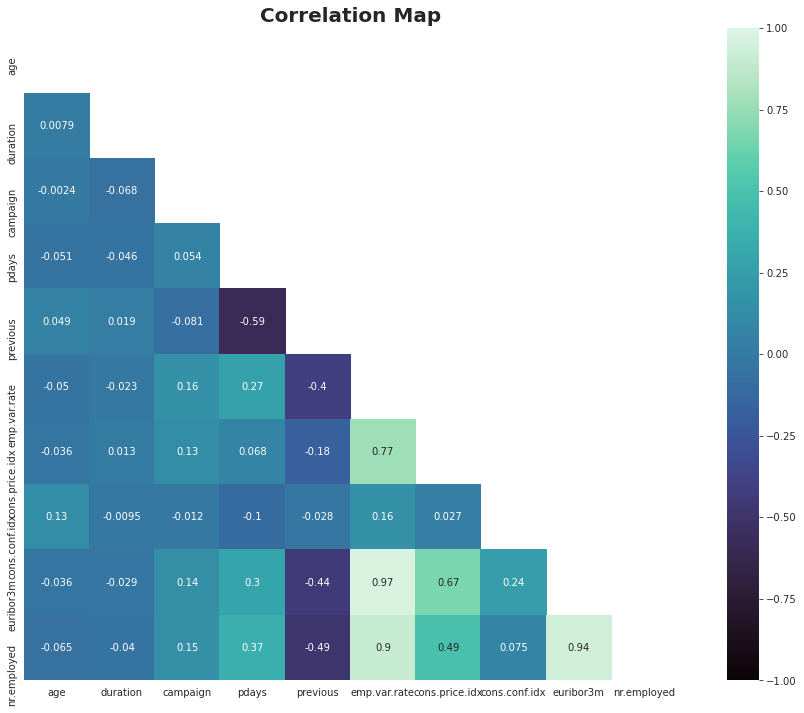

In [456]:
mask = np.zeros_like(df[numeric_columns].corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  fig, ax = plt.subplots(figsize=(18, 12))
  sns.heatmap(df[numeric_columns].corr(), annot=True, ax=ax, square=True, mask=mask, cmap='mako', vmin=-1, vmax=1).set_title("Correlation Map",fontdict= { 'fontsize': 20, 'fontweight':'bold'});

we have emp.var.rate, pdays, cons.price.idx, nr.employed that has high correlations with other feature, so we need to remove this columns

In [457]:
del df['emp.var.rate']
del df['pdays']
del df['cons.price.idx']
del df['nr.employed']

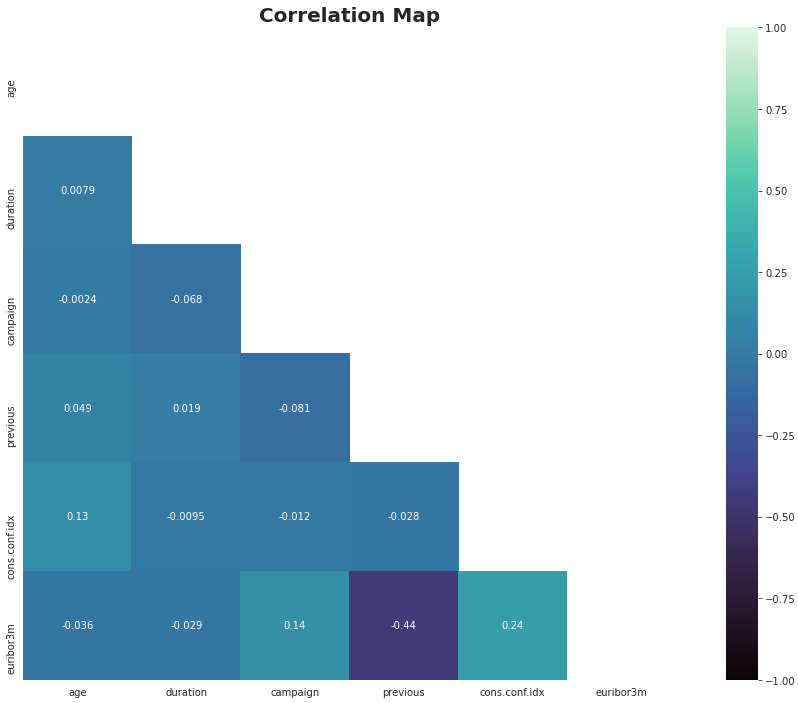

In [458]:
numeric_columns = ['age','duration','campaign','previous','cons.conf.idx','euribor3m']

mask = np.zeros_like(df[numeric_columns].corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  fig, ax = plt.subplots(figsize=(18, 12))
  sns.heatmap(df[numeric_columns].corr(), annot=True, ax=ax, square=True, mask=mask, cmap='mako', vmin=-1, vmax=1).set_title("Correlation Map",fontdict= { 'fontsize': 20, 'fontweight':'bold'});

#### Oversampling

We know from the exploration above, this dataset has unbalanced target.
So, we are going to oversampling this dataset to make it balanced.

In [459]:
#import Smote for oversampling
from imblearn.over_sampling import SMOTE

X = df.copy().drop(columns=['y'])
y = df.copy().y

#oversampling dengan library smote, class minority jumlah nya dinaikkan agar 1:1 dengan class majority
smo = SMOTE()
X, y = smo.fit_resample(X, y)

#### Splitting the data

In [460]:
# split the data 
from sklearn.model_selection import train_test_split

# set the test data to 20%, so we have 80% data train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### scaling the data

In [461]:
minmax_scaler = MinMaxScaler()

numeric_columns = ['age','duration','campaign','previous','cons.conf.idx','euribor3m']

#fit and transform scaler to train
X_train.loc[:,numeric_columns] = minmax_scaler.fit_transform(X_train.loc[:,numeric_columns])

#transform the test data, using scaler that only scaling the data train to avoid data leakage
X_test.loc[:,numeric_columns] = minmax_scaler.transform(X_test.loc[:,numeric_columns])

C:\Users\62852\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\62852\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [462]:
X_train

,age,duration,campaign,previous,cons.conf.idx,euribor3m,poutcome_nonexistent,poutcome_success,marital_married,marital_single,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,loan_yes,contact_telephone
43774,0.153846,0.14475,0.023810,0.000000,0.615063,0.982067,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3766,0.230769,0.04925,0.000000,0.000000,0.602510,0.957379,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
13683,0.282051,0.02150,0.000000,0.000000,0.615063,0.981864,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
16345,0.307692,0.03875,0.000000,0.142857,0.368201,0.806393,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2029,0.192308,0.02925,0.000000,0.000000,0.602510,0.958059,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.192308,0.03875,0.071429,0.000000,0.338912,0.981183,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44732,0.115385,0.16275,0.000000,0.000000,0.155426,0.130081,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38158,0.230769,0.09825,0.047619,0.000000,0.853528,0.027225,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0.474359,0.05000,0.023810,0.000000,0.602510,0.956926,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [463]:
X_test

,age,duration,campaign,previous,cons.conf.idx,euribor3m,poutcome_nonexistent,poutcome_success,marital_married,marital_single,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,loan_yes,contact_telephone
7481,0.487179,0.00225,0.119048,0.000000,0.376569,0.980503,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
50495,0.230769,0.11825,0.000000,0.000000,0.810773,0.048896,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16749,0.230769,0.05275,0.023810,0.142857,0.368201,0.806393,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
17782,0.269231,0.01775,0.095238,0.000000,0.368201,0.790297,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45746,0.256410,0.15825,0.023810,0.000000,0.351793,0.896599,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43698,0.153846,0.11500,0.000000,0.000000,0.174389,0.252439,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3563,0.243590,0.04375,0.023810,0.000000,0.602510,0.957379,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
38574,0.192308,0.03725,0.000000,0.142857,0.873248,0.040082,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9672,0.153846,0.03225,0.119048,0.000000,0.338912,0.980050,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


### Training and Validating Model

Now, we need to training data and using cross validations to tune the hyperparameter <br>
for tuning the hyperparameter + cross validation, we will use library GridSearchCV.

In [464]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import GridSearchCV

#for visualizing the total score
score = []

##### Random Forest Model

In [465]:
# Create the parameter grid based on the results of grid search 
param_grid = {
    'bootstrap': [True],
    'criterion' : ['gini', 'entropy'],
    'max_depth': [80, 90],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 200, 400],
    'random_state': [42]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
cv_rf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

In [466]:
cv_rf.fit(X_train, y_train)

cv_rf.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 80,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200,
 'random_state': 42}

##### Logistic Regression Model

In [312]:
# Create the parameter grid based on the results of grid search
param_grid = {
    'C' : np.logspace(-4,4,10),
    'max_iter' : [800]
}
# Create a based model
lr = LogisticRegression()
# Instantiate the grid search model
cv_lr = GridSearchCV(estimator = lr, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

In [313]:
cv_lr.fit(X_train, y_train)

cv_lr.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'C': 21.54434690031882, 'max_iter': 800}

##### K-Nearest Neighbors Model

In [323]:
# Create the parameter grid based on the results of grid search
param_grid = {
    'n_neighbors':[3,5,7]
}

# Create a based model
knn = KNeighborsClassifier()
# Instantiate the grid search model
cv_knn = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

In [324]:
cv_knn.fit(X_train, y_train)

cv_knn.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'n_neighbors': 3}

##### Decision Tree Model

In [326]:
# Create the parameter grid based on the results of grid search 
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [80, 90],
    'max_features': ['auto','sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [2, 4, 8, 10],
    'random_state': [42]
}
# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
cv_dt = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

In [327]:
cv_dt.fit(X_train, y_train)

cv_dt.best_params_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


{'criterion': 'gini',
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'random_state': 42}

##### Naive Bayes Model

In [329]:
# Create the parameter grid based on the results of grid search
param_grid = {
    'var_smoothing' : np.logspace(0,-9,20),
}
# Create a based model
gnb = GaussianNB()
# Instantiate the grid search model
cv_gnb = GridSearchCV(estimator = gnb, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

In [330]:
cv_gnb.fit(X_train, y_train)

cv_gnb.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'var_smoothing': 0.00016237767391887227}

##### SVM Model

In [333]:
# karena SVM terlalu lama di laptop saya, saya hanya memakai default parameter
svm_model = svm.SVC(kernel='linear')

svm_model.fit(X_train, y_train)

SVC(kernel='linear')

### Testing the Model

After training and tuning hyperparameter, now we need to test the model with the best parameter that we have in Cross Validation.

##### Random Forest Model

In [467]:
# lets do the random forest modeling
y_pred = cv_rf.predict(X_test)
print(classification_report(y_test, y_pred))

score.append(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      5300
           1       0.93      0.95      0.94      5352

    accuracy                           0.94     10652
   macro avg       0.94      0.94      0.94     10652
weighted avg       0.94      0.94      0.94     10652



##### Logistic Regression Model

In [357]:
y_pred = cv_lr.predict(X_test)
print(classification_report(y_test, y_pred))

score.append(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      5300
           1       0.92      0.91      0.91      5352

    accuracy                           0.91     10652
   macro avg       0.91      0.91      0.91     10652
weighted avg       0.92      0.91      0.91     10652



##### K-Nearest Neighbors Model

In [358]:
y_pred = cv_knn.predict(X_test)
print(classification_report(y_test, y_pred))

score.append(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      5300
           1       0.92      0.89      0.91      5352

    accuracy                           0.91     10652
   macro avg       0.91      0.91      0.91     10652
weighted avg       0.91      0.91      0.91     10652



##### Decision Tree Model

In [359]:
y_pred = cv_dt.predict(X_test)
print(classification_report(y_test, y_pred))

score.append(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      5300
           1       0.90      0.91      0.91      5352

    accuracy                           0.91     10652
   macro avg       0.91      0.91      0.91     10652
weighted avg       0.91      0.91      0.91     10652



##### Naive Bayes Model

In [360]:
y_pred = cv_gnb.predict(X_test)
print(classification_report(y_test, y_pred))

score.append(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      5300
           1       0.80      0.88      0.84      5352

    accuracy                           0.83     10652
   macro avg       0.83      0.83      0.83     10652
weighted avg       0.83      0.83      0.83     10652



##### SVM Model

In [361]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

score.append(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      5300
           1       0.93      0.91      0.92      5352

    accuracy                           0.92     10652
   macro avg       0.92      0.92      0.92     10652
weighted avg       0.92      0.92      0.92     10652



In [362]:
method = ['Random Forest', 'Logistic Regression', 'KNN', 'Decision Tree', 'G. Naive bayes', 'SVM']

score_list = {'method':method, 'score':score}
score_list = pd.DataFrame(score_list)

In [363]:
score_list.sort_values(by='score', ascending=False, inplace=True)

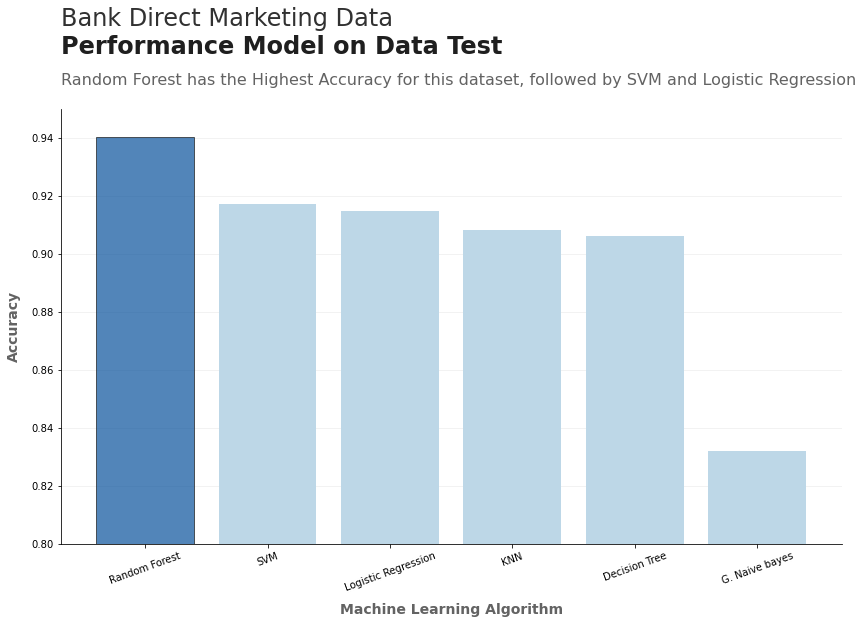

In [371]:
# membuat plot barchart
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(score_list['method'], score_list['score'], color=colors_blue[1])

# menandai bar paling besar
bars[0].set_alpha(0.7)
bars[0].set_color(colors_blue[4])
bars[0].set_edgecolor(colors_dark[0])

# setting figure
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', alpha=0.2)
ax.set_axisbelow(True)

ax = plt.gca()
ax.set_ylim([0.8, 0.95])

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# set label
ax.set_xlabel("Machine Learning Algorithm", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[2])
ax.set_ylabel("Accuracy", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[2])

plt.text(s="Bank Direct Marketing Data", ha='left', x=xmin, y=ymax*1.03, fontsize=24, color=colors_dark[1])
plt.text(s="Performance Model on Data Test", ha='left', x=xmin, y=ymax*1.02, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Random Forest has the Highest Accuracy for this dataset, followed by SVM and Logistic Regression", y=1.04, loc='left', fontsize=16, color=colors_dark[2]) 

locs, labels = plt.xticks()
plt.setp(labels, rotation=20)
plt.show()

### Kesimpulan

Setelah melakukan eksplorasi eksplorasi pada data, seperti melihat distribusi dari targetnya, lalu melihat distribusi ditiap kolom numerik dan kategorikal, telah dilakukan : <br>

- Membuang kolom/fitur yang kurang berguna atau redundant pada kolom kategorical.
- Melihat korelasi antar fitur numerik, apakah ada yang terlalu berkorelasi. Jika ada korelasi yang terlalu tinggi antar fitur, maka fitur tersebut di drop.
- Kita ketahui bahwa Dataset ini memiliki target yang unbalance, maka dilakukanlah teknik oversampling agar dataset menjadi balanced. Mengapa Oversampling ? karena data akan terbuang begitu saja saat undersampling, sedangkan seharusnya lebih banyak data itu lebih baik.
- Splitting data training dan data test sebesar 80:20.
- Lalu menormalisasikan fitur numerik dengan minmax scaler.

Setelah datanya siap, kita dapat melakukan training dan validation terhadap data train. <br>
Dengan menggunakan GridSearchCV, kita dapat melakukan cross validation sekaligus melakukan hyperparameter tuning.

Dari Hasil model yang telah di tuning hyperparameternya, lalu kita test model tersebut dan didapatkan hasil :
- Setiap model memiliki f1-score yang seimbang dan memilki accuracy diatas 80%.
- Random Forest merupakan algoritma machine learning yang memiliki Accuracy dan F1-score tertinggi, dengan accuracy sebesar 94%
- Wajar apabila Random Forest merupakan yang terbaik, karena disini Random Forest merupakan metode algoritma ensemble jika dibandingkan dengan metode lain.
- SVM dan Logistic Regression tidak terlalu jauh accuracy nya dibandingkan Random Forest.
- Gaussian Naive Bayes merupakan algoritma dengan accuracy paling kecil, tapi menurut saya tidak terlalu buruk juga.